In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [8]:
start='2012-01-01'
end='2023-12-12'
stock='NVDA'
data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,0.357500,0.360000,0.350250,0.351000,0.321919,468044000
2012-01-04,0.351250,0.356500,0.348000,0.355000,0.325588,347372000
2012-01-05,0.353250,0.369500,0.351750,0.367750,0.337281,563548000
2012-01-06,0.367500,0.367750,0.359250,0.363500,0.333383,533252000
2012-01-09,0.363750,0.370500,0.361000,0.363500,0.333383,508244000
...,...,...,...,...,...,...
2023-12-05,45.466000,46.599998,45.271000,46.566002,46.556011,371718000
2023-12-06,47.215000,47.387001,45.411999,45.502998,45.493233,380590000
2023-12-07,45.700001,46.629002,45.604000,46.596001,46.586002,350823000


In [10]:
data.reset_index(inplace=True)

In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,0.357500,0.360000,0.350250,0.351000,0.321919,468044000
1,2012-01-04,0.351250,0.356500,0.348000,0.355000,0.325588,347372000
2,2012-01-05,0.353250,0.369500,0.351750,0.367750,0.337281,563548000
3,2012-01-06,0.367500,0.367750,0.359250,0.363500,0.333383,533252000
4,2012-01-09,0.363750,0.370500,0.361000,0.363500,0.333383,508244000
...,...,...,...,...,...,...,...
3000,2023-12-05,45.466000,46.599998,45.271000,46.566002,46.556011,371718000
3001,2023-12-06,47.215000,47.387001,45.411999,45.502998,45.493233,380590000
3002,2023-12-07,45.700001,46.629002,45.604000,46.596001,46.586002,350823000
3003,2023-12-08,46.595001,47.741001,46.549999,47.506001,47.495808,359224000


In [12]:
ma_100_days=data.Close.rolling(100).mean()

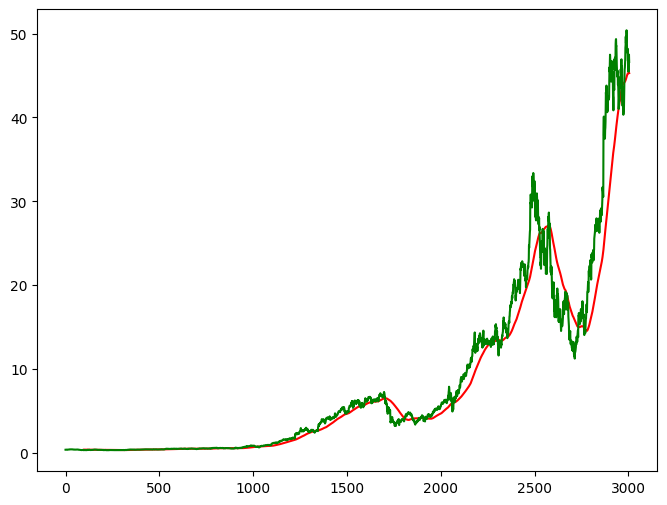

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [14]:
ma_200_days= data.Close.rolling(200).mean()

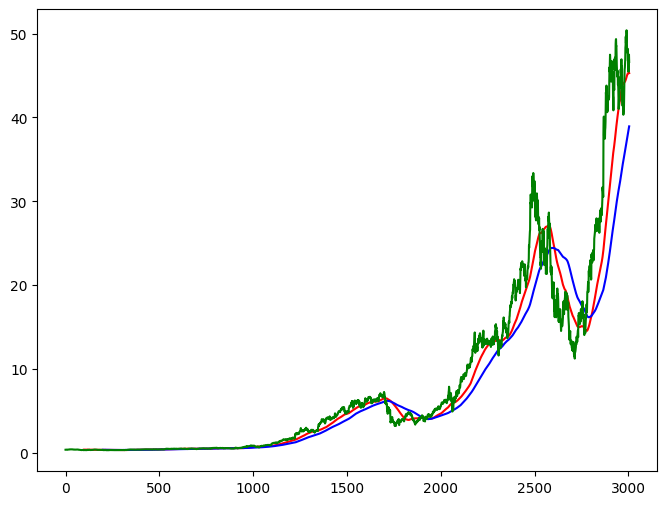

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [16]:
data.dropna(inplace=True)

In [17]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [18]:
data_train.shape[0]

2404

In [19]:
data_test.shape[0]

601

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [21]:
data_train_scale=scaler.fit_transform(data_train)

In [22]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [23]:
x,y=np.array(x), np.array(y)

In [24]:
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(Input(shape=(x.shape[1],1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 208ms/step - loss: 0.0252
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - loss: 0.0032
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - loss: 0.0034
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - loss: 0.0022
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - loss: 0.0028
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - loss: 0.0022
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - loss: 0.0026
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - loss: 0.0024
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - loss: 0.0025
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - loss: 0.0024
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - loss: 0.0018
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step - loss: 0.0021
Epoch 13/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - loss: 0.0021
Epoch 14/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - loss: 0.0023
Epoch 15/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [29]:
pas_100_days=data_train.tail(100)

In [30]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [32]:
data_test_scale=scaler.fit_transform(data_test)

In [35]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [36]:
y_predict=model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step


In [40]:
scale=1/scaler.scale_

In [41]:
y_predict=y_predict*scale

In [42]:
y=y*scale

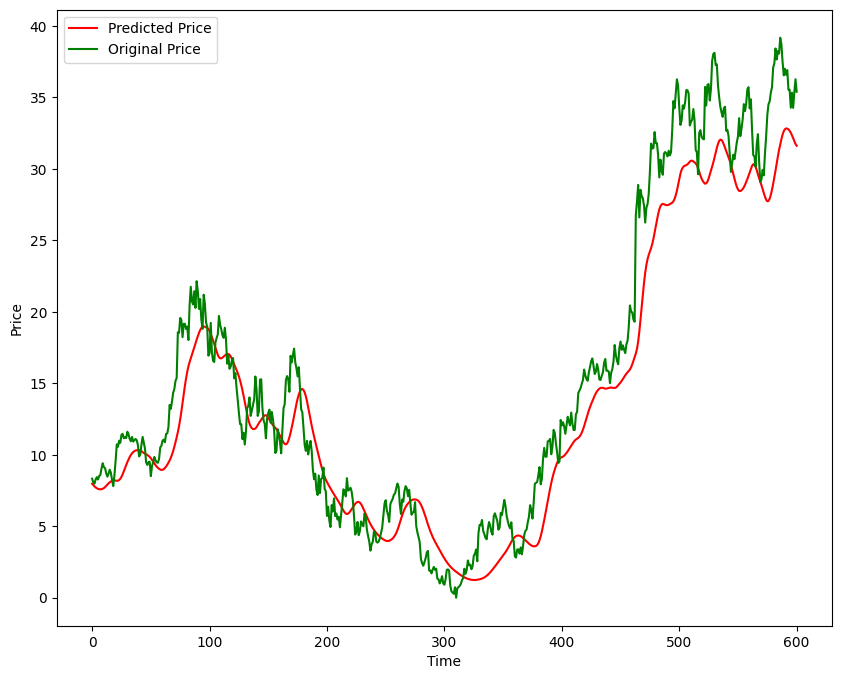

In [43]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
model.save('Stock Prediction Model.keras')